# ResNET with more freezing (75%)

### Import Module

In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms

from data_utils import RadiographyDataset, train_model, produce_stats
from model import ResNet_less_train

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=1), 
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.5], std=[0.5]) 
])

### Dataset Load and Dataloader preparation

In [4]:
train_dataset = RadiographyDataset(metadata_path = "metadata.csv", transform=transform, file_type="train")
test_dataset = RadiographyDataset(metadata_path = "metadata.csv", transform=transform, file_type="test")
val_dataset = RadiographyDataset(metadata_path = "metadata.csv", transform=transform, file_type="val")

In [5]:
trainloader = DataLoader(train_dataset, batch_size=32, num_workers=8, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=32, num_workers=8, shuffle=False)
valloader = DataLoader(val_dataset, batch_size=32, num_workers=8, shuffle=False)

### Model setup

In [6]:
model18 = ResNet_less_train(model_name='resnet18', pretrained=True, freeze_half=True, num_classes=4).to(device)
model34 = ResNet_less_train(model_name='resnet34', pretrained=True, freeze_half=True, num_classes=4).to(device)

c:\Users\hwasu\miniconda3\envs\bme_final\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\hwasu\miniconda3\envs\bme_final\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\hwasu\miniconda3\envs\bme_final\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=

### Train and produce Stats

#### ResNet 18 75% model18_4

Epoch 1/10, Train Loss: 0.3751, Val Loss: 0.4105


Epoch 2/10, Train Loss: 0.2618, Val Loss: 0.3526


Epoch 3/10, Train Loss: 0.2106, Val Loss: 0.2433


Epoch 4/10, Train Loss: 0.1806, Val Loss: 0.2093


Epoch 5/10, Train Loss: 0.1478, Val Loss: 0.2822


Epoch 6/10, Train Loss: 0.1136, Val Loss: 0.3027


Epoch 7/10, Train Loss: 0.0887, Val Loss: 0.2448


Epoch 8/10, Train Loss: 0.0707, Val Loss: 0.2565


Epoch 9/10, Train Loss: 0.0501, Val Loss: 0.3193


Epoch 10/10, Train Loss: 0.0533, Val Loss: 0.3268


Test Loss: 0.2940, Test Accuracy: 0.9277


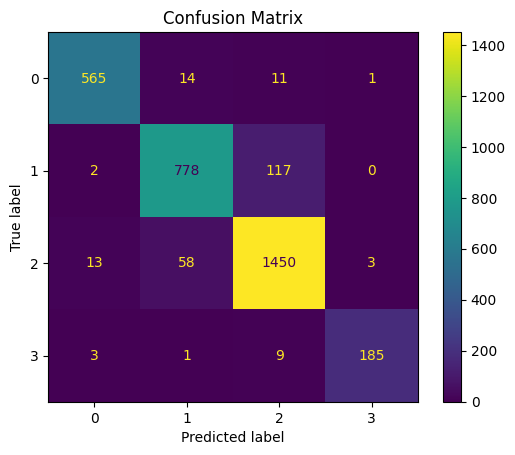

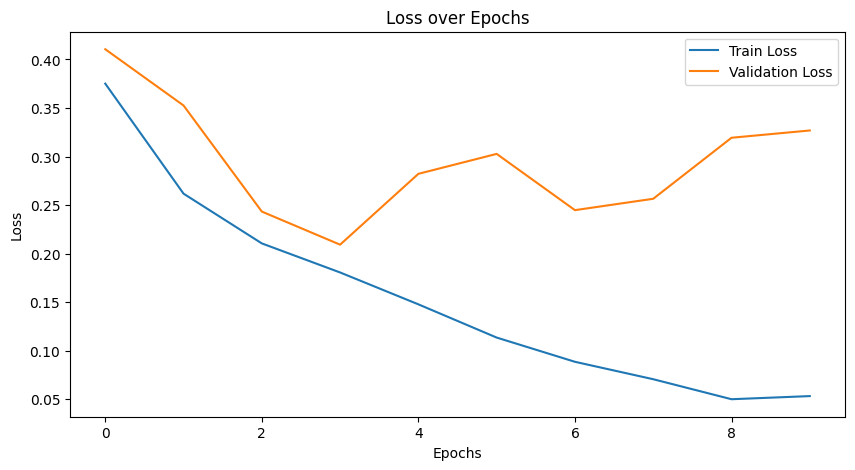

In [7]:
model18_trained, train_loss_18, val_loss_18 = train_model(model18, trainloader, valloader, device)
model18_dict = produce_stats(model18_trained, testloader, train_loss_18, val_loss_18, device)

#### ResNet 34 75% model18_4

Epoch 1/10, Train Loss: 0.4174, Val Loss: 0.3105


Epoch 2/10, Train Loss: 0.2927, Val Loss: 0.2937


Epoch 3/10, Train Loss: 0.2294, Val Loss: 0.2720


Epoch 4/10, Train Loss: 0.1983, Val Loss: 0.3563


Epoch 5/10, Train Loss: 0.1819, Val Loss: 0.2219


Epoch 6/10, Train Loss: 0.1310, Val Loss: 0.2369


Epoch 7/10, Train Loss: 0.1106, Val Loss: 0.2630


Epoch 8/10, Train Loss: 0.0912, Val Loss: 0.4199


Epoch 9/10, Train Loss: 0.0657, Val Loss: 0.4083


Epoch 10/10, Train Loss: 0.0694, Val Loss: 0.2884


Test Loss: 0.2612, Test Accuracy: 0.9240


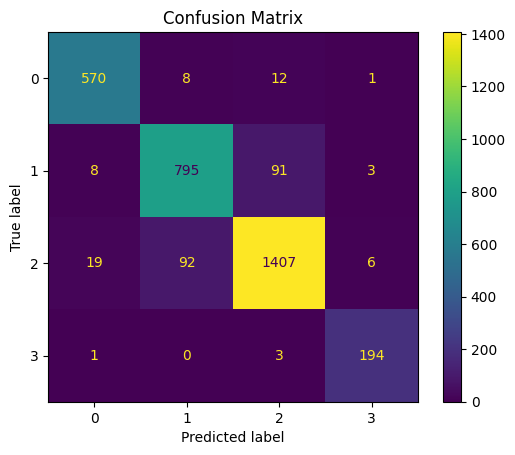

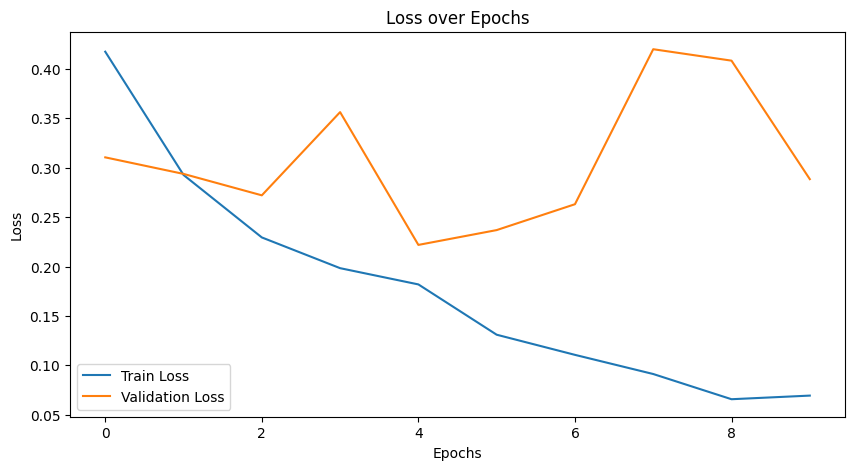

In [8]:
model34_trained, train_loss_34, val_loss_34 = train_model(model34, trainloader, valloader, device)
model34_dict = produce_stats(model34_trained, testloader, train_loss_34, val_loss_34, device)

### Save models for later

In [9]:
torch.save(model18_dict, "model/model18_4.pt")
torch.save(model34_dict, "model/model34_4.pt")
